In [1]:
from User import User 
from Model import model
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## Best Path Algorithm

In [2]:
#function for best path to transmit information

def best_path(users,source,target):
    '''
    Find the shortest path between users with information and users that need that information
    
    users (list): List of User objects
    
    Returns:
    - shortest_path (list): List of User objects representing the shortest path from the user with information to the user that needs that information
    '''
    # Create a directed graph to represent the relationships between users
    G = nx.DiGraph()
    for user in users:
        G.add_node(user)
        for relation in user.get_relations():
            misinformation_weight = user.get_score()+relation.get_score()
            G.add_edge(user, relation,weight = misinformation_weight)
           
    if source is None or target is None:
        print("Error: At least one user with information and one user that needs information should be present")
        return None
    
    if (nx.has_path(G,source,target)):
        
        #true if no user in shortest path has next_state set to 0
        go_ahead = True
        
        while(go_ahead):
            # Find the shortest path between the user with information and the user that needs information
            shortest_path = nx.shortest_path(G, source, target,weight="weight")
            all_user_next_state=0
            for user in shortest_path:
                if user.get_next_state==0:
                    all_user_next_state=0
                else:
                    all_user_next_state=1
            if all_user_next_state==1:
                return shortest_path
    
    return None


## Populating a model with users and its animation

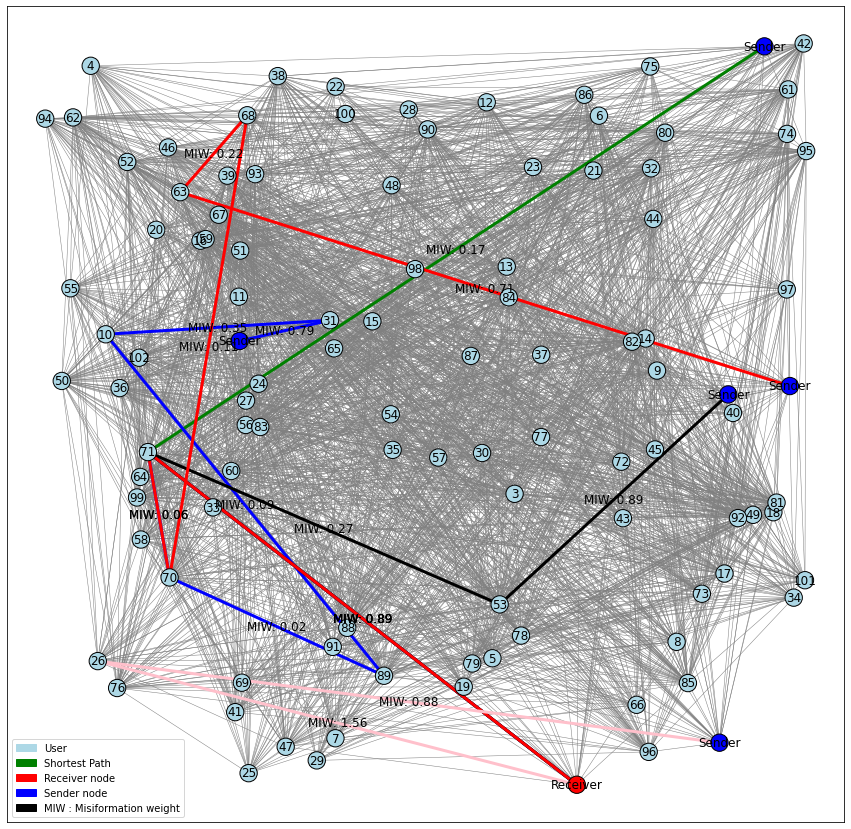

In [3]:
mod = model(200, 200)

sender_list = []
# Add senders to the model
for i in range(5):
    user = User()
    user.set_carrier(True)
    user.set_color("blue")
    user.set_name("Sender")
    mod.add_user(user)
    sender_list.append(user)

#populate the model
for i in range(100):
    user = User()
    user.set_color()
    user.set_name("{}".format(i+3))
    mod.add_user(user)
    
#add the receiver to model
receiver_user = User(receiver=True)
receiver_user.set_color("red")
receiver_user.set_name("Receiver")
mod.add_user(receiver_user)

mod.set_relations()
mod.set_user_properties()

# Call best_path and plot functions
shortest_paths = []

#find shortest paths from all senders to receiver
for sender in sender_list:
    shortest_path = best_path(mod.users,sender,receiver_user)
    shortest_paths.append(shortest_path)

#plot the model
mod.plot(shortest_paths)

#### Misinformation weight of the shortest paths

The total misinformation weight in green path is 1.06
The total misinformation weight in blue path is 2.19
The total misinformation weight in black path is 1.84
The total misinformation weight in red path is 1.4
The total misinformation weight in pink path is 0.08


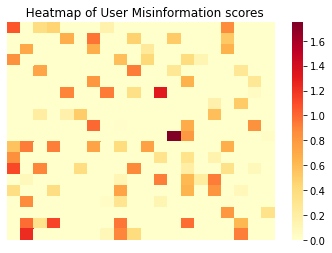

In [4]:
mod.print_statements()
mod.heatmap()

# Building Machine Learning Model
### Loading the manual dataset

In [5]:
df = pd.read_csv("cmse202_dataset.csv")
df

user gender  age     score  num_relations  relation_credibility_index  \
0       1      M   18  0.025926              5                    0.312500   
1       2      M   32  0.623812              9                    0.450000   
2       3      F   20  0.668526              2                    0.105263   
3       4      F   27  0.917907             12                    0.631579   
4       5      M   33  0.204780             12                    0.631579   
..    ...    ...  ...       ...            ...                         ...   
495   496      M   35  0.587087             12                    0.800000   
496   497      M   21  0.393716             10                    0.555556   
497   498      F   31  0.901113              8                    0.400000   
498   499      M   29  0.950467             12                    0.666667   
499   500      F   32  0.953605             11                    0.733333   

     misinformation_rate  previous_info_shared  next_shared_info_prediction  
0               0.040509                     1                            1  
1               2.526438                     1                            0  
2               0.140742                     1                            0  
3               6.956766                     1                            1  
4               1.552015                     0                            1  
..                   ...                   ...                          ...  
495             5.636035                     0                            1  
496             2.187312                     0                            0  
497             2.883560                     1                            0  
498             7.603735                     0                            0  
499             7.692415                     1                            0  

[500 rows x 9 columns]

### Model for this User dataset

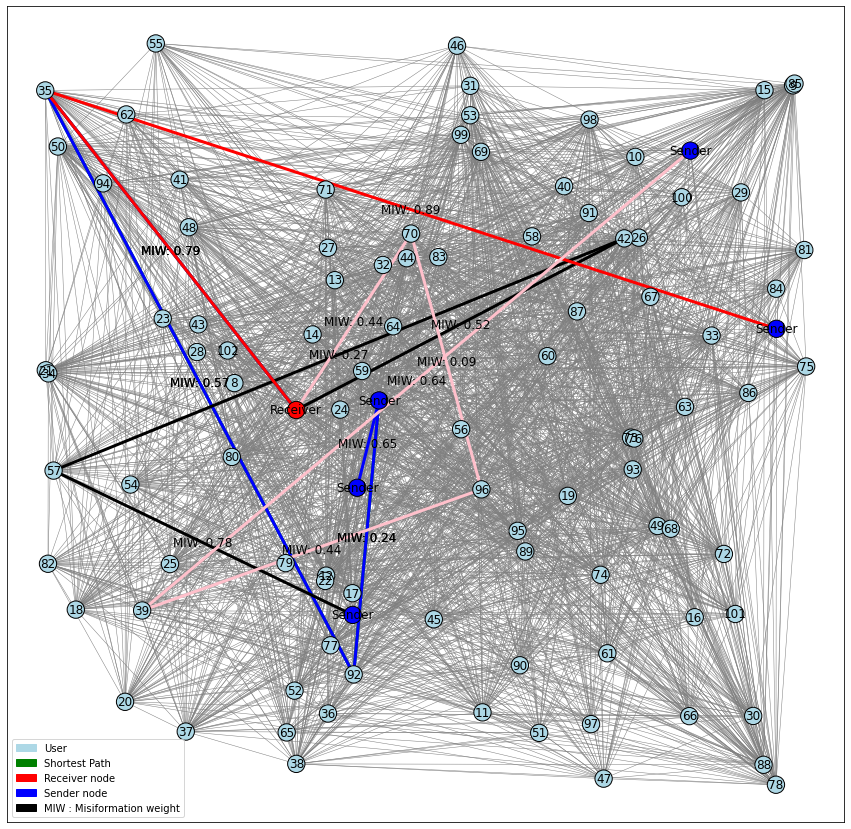

In [6]:
model_df = model(200, 200)

users_list = []
for index, row in df.iterrows():
    pos = (random.uniform(0,200), random.uniform(0,200))
    user = User()
    user.set_position(pos)
    user.set_score(row[3])
    user.set_age(row[2])
    user.set_relation_credit(row[5])
    user.set_misinformation_rate(row[6])
    #user.set_num_realtions(row[4])
    users_list.append(user)
    
sender_list = []
# Add senders to the model
for i in range(5):
    user = users_list[i]
    user.set_carrier(True)
    user.set_color("blue")
    user.set_name("Sender")
    model_df.add_user(user)
    sender_list.append(user)

#populate the model
for i in range(5,100):
    user = users_list[i]
    user.set_color()
    user.set_name("{}".format(i+3))
    model_df.add_user(user)
    
#add the receiver to model
receiver_user = User(receiver=True)
receiver_user.set_color("red")
receiver_user.set_name("Receiver")
receiver_user.set_score(0.5)
model_df.add_user(receiver_user)

model_df.set_relations()
model_df.set_user_properties()

# Call best_path and plot functions
shortest_paths = []

#find shortest paths from all senders to receiver
for sender in sender_list:
    shortest_path = best_path(model_df.users,sender,receiver_user)
    shortest_paths.append(shortest_path)

#plot the model
model_df.plot(shortest_paths)


The total misinformation weight in green path is 1.6
The total misinformation weight in blue path is 2.25
The total misinformation weight in black path is 1.6
The total misinformation weight in red path is 0.89
The total misinformation weight in pink path is 2.25


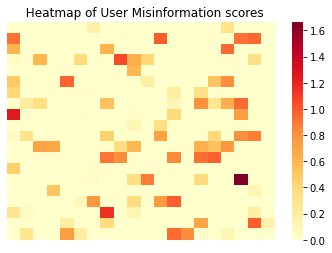

In [7]:
model_df.print_statements()
model_df.heatmap()

### Creating the training and testing data for ML model

In [8]:
label = df["next_shared_info_prediction"]
Features = df.drop(["next_shared_info_prediction", "gender","age","user"], axis=1)
train_labels, test_labels, train_vectors, test_vectors = train_test_split(label, Features, test_size=0.25, train_size=0.75)

### Running Logistic regression and SVM Model

In [9]:
logit_model = sm.Logit(train_labels, sm.add_constant(train_vectors))
result = logit_model.fit()

# Summarize the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.691802
         Iterations 4
                                Logit Regression Results                               
Dep. Variable:     next_shared_info_prediction   No. Observations:                  375
Model:                                   Logit   Df Residuals:                      369
Method:                                    MLE   Df Model:                            5
Date:                         Mon, 24 Apr 2023   Pseudo R-squ.:                0.001321
Time:                                 23:43:48   Log-Likelihood:                -259.43
converged:                                True   LL-Null:                       -259.77
Covariance Type:                     nonrobust   LLR p-value:                    0.9837
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
cons

#### Following cell takes some time (3-4mins) as the data set produced is mostly random-based.

In [10]:
#make some temporary variables so you can change this easily
tmp_vectors = train_vectors
tmp_labels = train_labels

print("Fitting the classifier to the training set")
# a dictionary of hyperparameters: key is the name of the parameter, value is a list of values to test
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.01, 0.1,1.0,10.0],
              'kernel': ['linear','rbf']}
# make a classifier by searching over a classifier and the parameter grid
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid,n_jobs=-1)

# we have a "good" classifier (according to GridSearchCV), how's it look
clf = clf.fit(tmp_vectors, tmp_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)
print("Best parameters found by grid search:")
print(clf.best_params_)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.1)
Best parameters found by grid search:
{'C': 1000.0, 'gamma': 0.1, 'kernel': 'rbf'}


Precision: 0.4090909090909091
Recall: 0.5192307692307693
Accuracy: 0.488


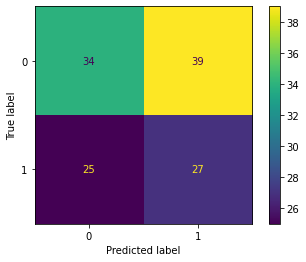

In [11]:
# Using the best-fit SVM model to predict on the test set
svm_clf = SVC(C=10000.0, gamma=0.001, kernel='rbf', class_weight='balanced')
svm_clf.fit(train_vectors, train_labels)
predicted_labels = svm_clf.predict(test_vectors)

# Calculating and printing the confusion matrix
conf_mat = confusion_matrix(test_labels, predicted_labels)
#print("Confusion matrix:\n", conf_mat)
ConfusionMatrixDisplay.from_estimator(svm_clf, test_vectors, test_labels)
# Calculating precision, recall, and accuracy
tp = conf_mat[1, 1]
fp = conf_mat[0, 1]
fn = conf_mat[1, 0]
tn = conf_mat[0, 0]
precision = tp / (tp + fp)
recall = tp / (tp + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

### Final classifier that is used for prediction

In [12]:
# Using the best-fit SVM model to predict on the test set
svm_clf = SVC(C=10000.0, gamma=0.001, kernel='rbf', class_weight='balanced')
svm_clf.fit(train_vectors, train_labels)

SVC(C=10000.0, class_weight='balanced', gamma=0.001)

### Set the predictions for each user using trained ML model

In [13]:
for user in model_df.get_users():
    
    feature_dict = user.get_properties()  # get feature dictionary
    feature_names = list(feature_dict.keys())  # get feature names

    # create numpy array from feature dictionary values
    feature_array = np.array([list(feature_dict.values())])

    # set the names of the features in the SVM classifier
    svm_clf.feature_names = feature_names

    # predict the label using the SVM classifier
    predicted_label = svm_clf.predict(feature_array)[0]

    # set the next state of the user object
    user.set_next_state(predicted_label)

### Updated Model after setting the predicted next states for user

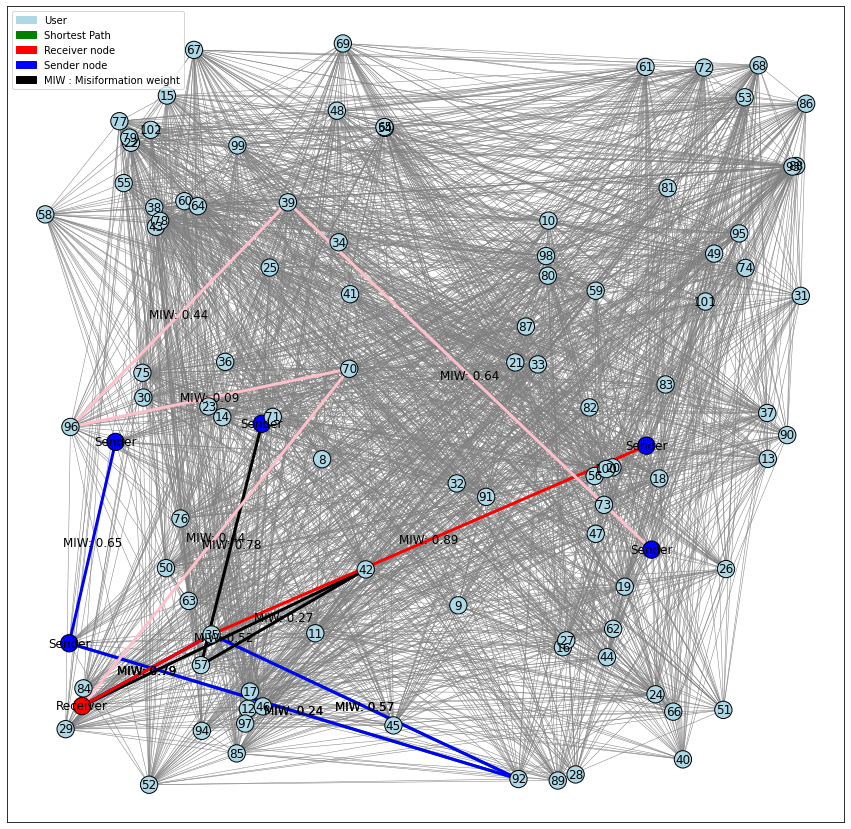

In [14]:
# Call best_path and plot functions
shortest_paths = []

#find shortest paths from all senders to receiver
for sender in sender_list:
    shortest_path = best_path(model_df.users,sender,receiver_user)
    shortest_paths.append(shortest_path)

#plot the model
model_df.plot(shortest_paths)

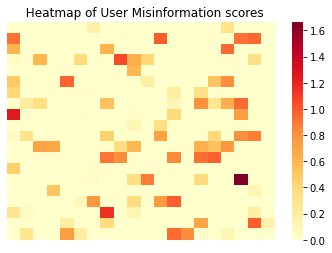

In [15]:
model_df.heatmap()

### Analysis on our dataset

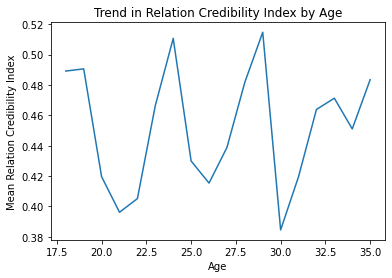

In [16]:
# Sort the DataFrame by age
df = df.sort_values('age')

# Group the DataFrame by age and calculate the mean relation credibility index for each age
grouped = df.groupby('age')['relation_credibility_index'].mean()

# Create the line chart
plt.plot(grouped.index, grouped.values)
plt.xlabel('Age')
plt.ylabel('Mean Relation Credibility Index')
plt.title('Trend in Relation Credibility Index by Age')
plt.show()

##### The chart shows that mean relationship credibility index tends to increase with age up to around age 30, and then remains relatively stable or even decreases slightly beyond that age. This suggests that, on average, younger individuals may be perceived as having less trustworthy relationships than older individuals.

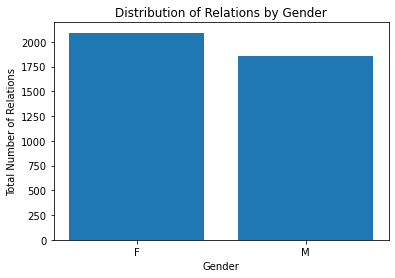

In [17]:
# Bar chart of the number of relations by gender
grouped = df.groupby('gender')['num_relations'].sum()
plt.bar(grouped.index, grouped.values)
plt.xlabel('Gender')
plt.ylabel('Total Number of Relations')
plt.title('Distribution of Relations by Gender')
plt.show()

##### The chart shows that, on average, the female group has a slightly higher credibility index than the male group. However, this difference could be due to the randomness rather than a true difference between the two groups.

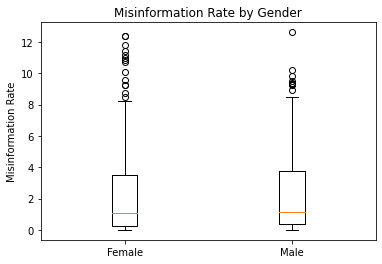

In [18]:
# Box plot of the misinformation rate by gender
plt.boxplot([df[df['gender']=='M']['misinformation_rate'], df[df['gender']=='F']['misinformation_rate']])
plt.xticks([2, 1], ['Male', 'Female'])
plt.ylabel('Misinformation Rate')
plt.title('Misinformation Rate by Gender')
plt.show()

##### Interpreting the box plot, we can see that the median misinformation rate for both genders is around 0.5, with a slightly larger spread in the male group. The range for the female group is slightly smaller than for the male group, indicating that the female group has less variability in their misinformation rate.